In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial.distance import euclidean
import mysql.connector
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_excel(r"C:\Users\Deepkiran\OneDrive\Desktop\Project 5\Project 5\telcom_data.xlsx")
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [3]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN                                    148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   L

In [4]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
print("Basic statistics:")
df.describe()

Basic statistics:


,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000,150000.000000,150000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,2019-04-26 12:36:38.953740032,499.188200,2019-04-27 17:40:08.059673344,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
min,2019-04-04 12:01:18,0.000000,2019-04-24 22:59:58,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,2019-04-25 00:26:00.750000128,250.000000,2019-04-26 07:30:11.500000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,2019-04-26 08:51:24.500000,499.000000,2019-04-27 23:02:05,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,2019-04-27 18:18:59.750000128,749.000000,2019-04-29 07:15:07.500000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,2019-04-29 07:28:43,999.000000,2019-04-30 23:59:27,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08
std,NaN,288.611834,NaN,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08


In [6]:
# Check for missing values and duplicates in the dataset
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN                                        1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
print("Number of duplicate rows:")
df.duplicated().sum()

Number of duplicate rows:


np.int64(0)

# Task 1 - User Overview Analysis


Identify the Top 10 Handsets Used by Customers

In [8]:
# Group by handset and count occurrences
top_handsets = df['Handset Type'].value_counts().head(10)

# Display the top 10 handsets
top_handsets

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

Identify the Top 3 Handset Manufacturers

In [9]:
# Group by manufacturer and count occurrences
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

# Display the top 3 manufacturers
top_manufacturers

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Identify the Top 5 Handsets per Top 3 Handset Manufacturer

In [10]:
top_5_handsets_per_manufacturer = df[df['Handset Manufacturer'].isin(top_manufacturers.index)].groupby(['Handset Manufacturer', 'Handset Type']).size().groupby(level=0, group_keys=False).nlargest(5)

# Display the top 5 handsets for each top manufacturer
top_5_handsets_per_manufacturer


Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
dtype: int64

Task 1.1 - User Behavior Overview

Aggregate per user data including session counts, durations, and data usage:


In [11]:
# Calculate 'Total Data Volume' if 'DL Data' and 'UL Data' columns exist
if 'Total DL (Bytes)' in df.columns and 'Total UL (Bytes)' in df.columns:
    df['Total Data Volume'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
else:
    print("Columns for 'Total DL (Bytes)' and 'Total UL (Bytes)' not found.")

# Display the first few rows to verify the new column
df[['Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data Volume']].head()

,Total DL (Bytes),Total UL (Bytes),Total Data Volume
0,308879636.0,36749741.0,345629377.0
1,653384965.0,53800391.0,707185356.0
2,279807335.0,27883638.0,307690973.0
3,846028530.0,43324218.0,889352748.0
4,569138589.0,38542814.0,607681403.0


In [12]:
# Convert relevant columns to numeric, coercing errors to NaN
columns_to_convert = ['Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling them with 0 (optional, based on context)
df[columns_to_convert] = df[columns_to_convert].fillna(0)

# Grouping and aggregating user behavior data
user_behavior = df.groupby('MSISDN').agg({
    'Bearer Id': 'sum',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
}).reset_index()

# Calculate Total Data Volume if not already present
if 'Total Data Volume' not in user_behavior.columns:
    user_behavior['Total Data Volume'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']

# Display the aggregated user behavior data
print(user_behavior.head())

         MSISDN     Bearer Id  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0  3.360100e+10  1.311448e+19   116720.0      8.426375e+08        36053108.0   
1  3.360100e+10  7.349883e+18   181230.0      1.207552e+08        36104459.0   
2  3.360100e+10  7.349883e+18   134969.0      5.566597e+08        39306820.0   
3  3.360101e+10  1.304243e+19    49878.0      4.019932e+08        20327526.0   
4  3.360101e+10  1.462771e+19    37104.0      1.363130e+09        94280527.0   

   Total Data Volume  
0       8.786906e+08  
1       1.568596e+08  
2       5.959665e+08  
3       4.223207e+08  
4       1.457411e+09  


Exploratory Data Analysis (EDA)

Treat Missing Values and Outliers

In [13]:
# Fill missing values only for numeric columns
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Treating outliers for 'Total Data Volume'
if 'Total Data Volume' in df.columns:
    q1 = df['Total Data Volume'].quantile(0.25)
    q3 = df['Total Data Volume'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Clip values outside the IQR range
    df['Total Data Volume'] = df['Total Data Volume'].clip(lower=lower_bound, upper=upper_bound)

# Display the first few rows to confirm the changes
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data Volume
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403.0


Univariate Analysis

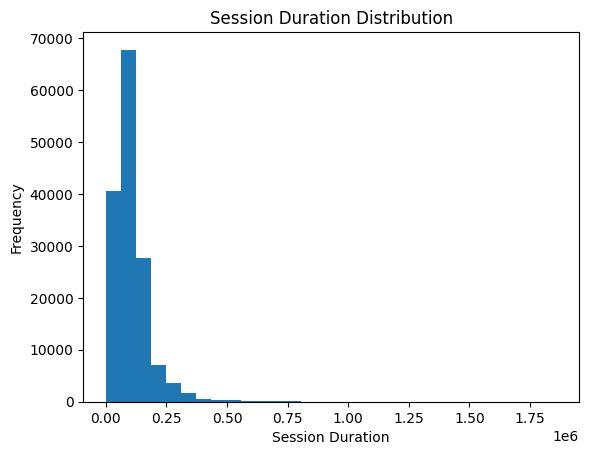

In [14]:
# Plot a histogram for session duration
plt.hist(df['Dur. (ms)'], bins=30)
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration')
plt.ylabel('Frequency')
plt.show()

Bivariate Analysisb

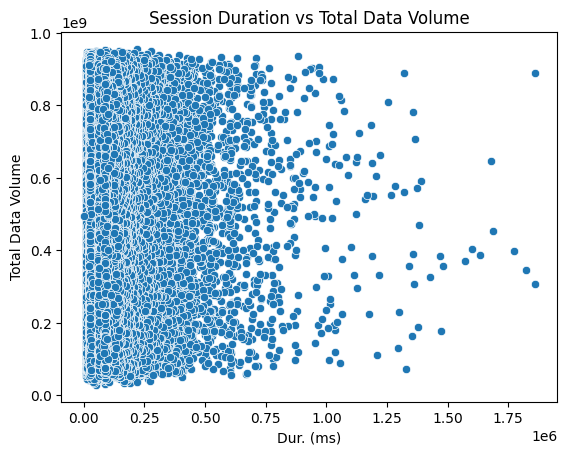

In [15]:
# Scatter plot between total data valume and session duration
sns.scatterplot(data=df, x='Dur. (ms)', y='Total Data Volume')
plt.title('Session Duration vs Total Data Volume')
plt.show()


Correlation Analysis

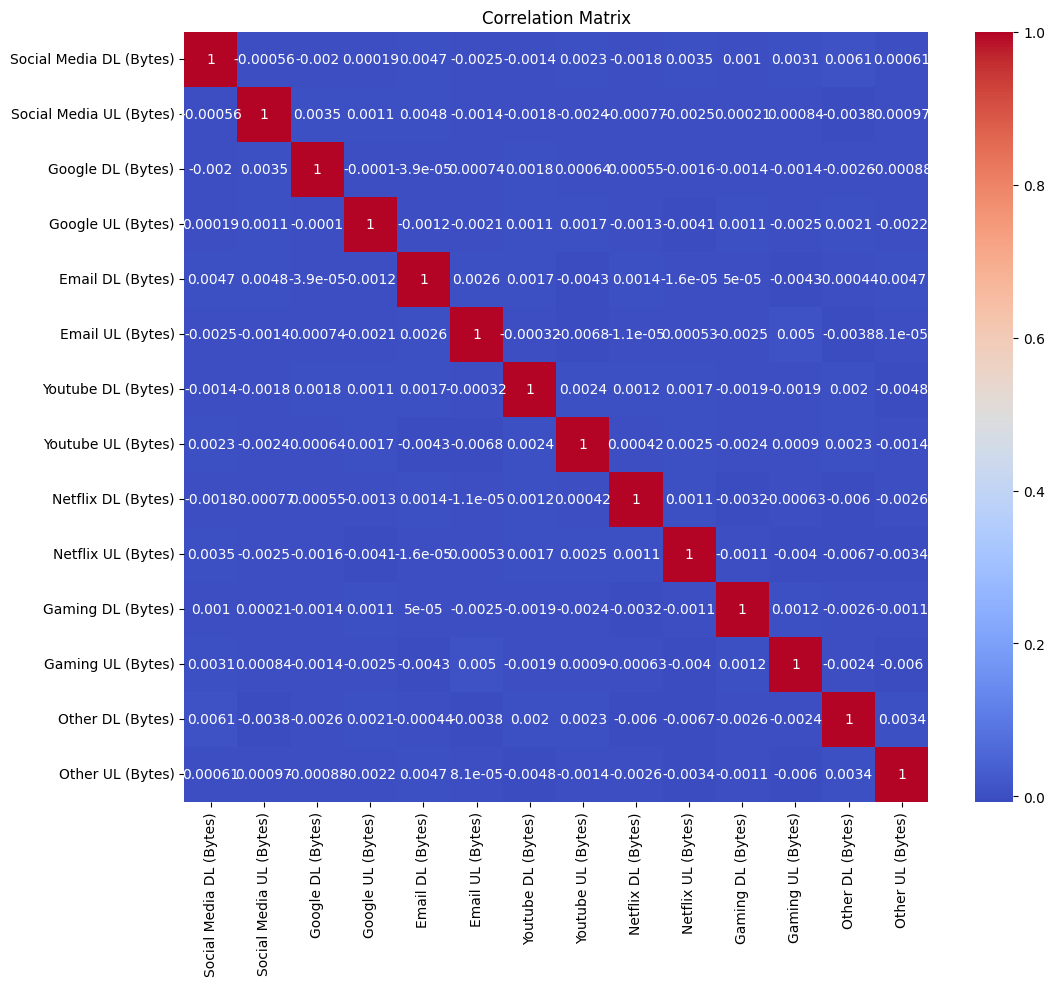

In [16]:
# Correlation matrix
correlation_matrix = df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)', 'Other UL (Bytes)']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dimensionality Reduction using PCA

In [17]:
# Selecting revevant features for PCA
features = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)', 'Other UL (Bytes)']
x = df[features]

# Standardize the data
x = (x - x.mean()) / x.std()

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Creat a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the PCA results
pca_df.head()


,PC1,PC2
0,-0.510853,0.743821
1,1.105911,-1.290993
2,-0.510058,0.038813
3,0.897307,-0.197027
4,1.080762,0.562216


# Task 2 - Engagement Matrics Analysis

Aggregate Metrics Per Customer ID


In [18]:
# Aggregate metrics per customer ID (MSISDN)
engagement_metrics = df.groupby('MSISDN').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total Data Volume': 'sum'
}).rename(columns={
    'Bearer Id': 'Session Frequency',
    'Dur. (ms)': 'Total Session Duration',
    'Total Data Volume': 'Total Traffic'
}).reset_index()

# Top 10 customers per engagement metric
top_customers_freq = engagement_metrics.nlargest(10, 'Session Frequency')
top_customers_duration = engagement_metrics.nlargest(10, 'Total Session Duration')
top_customers_traffic = engagement_metrics.nlargest(10, 'Total Traffic')

# Display the results
top_customers_freq
top_customers_duration
top_customers_traffic


,MSISDN,Session Frequency,Total Session Duration,Total Traffic
106853,4.188282e+10,1066,72446396.0,5.317447e+11
6437,3.361489e+10,17,9966898.0,8.846226e+09
92923,3.376054e+10,15,9279434.0,8.514774e+09
13180,3.362578e+10,17,18553754.0,8.499621e+09
13526,3.362632e+10,18,8791927.0,7.971167e+09
76363,3.367588e+10,15,4865947.0,7.891111e+09
37052,3.365973e+10,16,4035428.0,7.705863e+09
63028,3.366646e+10,11,4536757.0,7.308501e+09
92577,3.376041e+10,12,5321667.0,7.132371e+09
57241,3.366471e+10,11,2927785.0,6.872018e+09


Normalize Metrics and Run K-Means Clustering

In [19]:
# Normalize the engagement metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['Session Frequency', 'Total Session Duration', 'Total Traffic']])

# Run K-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Display the clustered data
engagement_metrics.head()

,MSISDN,Session Frequency,Total Session Duration,Total Traffic,Cluster
0,3.360100e+10,1,116720.0,8.786906e+08,0
1,3.360100e+10,1,181230.0,1.568596e+08,0
2,3.360100e+10,1,134969.0,5.959665e+08,0
3,3.360101e+10,1,49878.0,4.223207e+08,0
4,3.360101e+10,2,37104.0,1.457411e+09,0


 Compute Metrics for Each Cluster

In [20]:
# Compute metrics for each cluster
cluster_metrics = engagement_metrics.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Session Duration': ['min', 'max', 'mean', 'sum'],
    'Total Traffic': ['min', 'max', 'mean', 'sum']})

# Display the metrics for each cluster
cluster_metrics


Session Frequency                            Total Session Duration  \
                      min   max         mean     sum                    min   
Cluster                                                                       
0                       1     7     1.361945  144087                 7142.0   
1                    1066  1066  1066.000000    1066             72446396.0   
2                       1    18     4.569274    4848               567786.0   

                                                Total Traffic                \
                max          mean           sum           min           max   
Cluster                                                                       
0          783576.0  1.347567e+05  1.425658e+10  3.324901e+07  4.478299e+09   
1        72446396.0  7.244640e+07  7.244640e+07  5.317447e+11  5.317447e+11   
2        18553754.0  1.283934e+06  1.362254e+09  9.705338e+07  8.846226e+09   

                                     
                 mean           sum  
Cluster                              
0        6.751148e+08  7.142377e+13  
1        5.317447e+11  5.317447e+11  
2        2.271134e+09  2.409674e+12

 Visual Interpretation

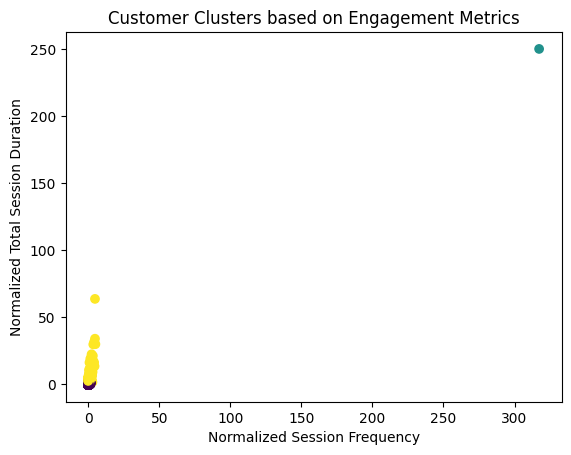

In [21]:
plt.scatter(normalized_metrics[:, 0], normalized_metrics[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Customer Clusters based on Engagement Metrics')
plt.xlabel('Normalized Session Frequency')
plt.ylabel('Normalized Total Session Duration')
plt.show()

Aggregate User Total Traffic per Application


In [22]:
# Adjust column names to match those in your dataset
engagement_metrics = df.groupby('MSISDN').agg({
    'Bearer Id': 'count',  # Count of sessions as 'xDR Sessions' is not present
    'Dur. (ms)': 'sum',  # Use 'Dur. (ms)' as the session duration
    'Total Data Volume': 'sum'  # Ensure 'Total Data Volume' matches
}).rename(columns={
    'Bearer Id': 'Session Frequency',  # Rename for session frequency
    'Dur. (ms)': 'Total Session Duration',  # Rename for session duration
    'Total Data Volume': 'Total Traffic'  # Rename for traffic
}).reset_index()

# Top 10 customers per engagement metric
top_customers_freq = engagement_metrics.nlargest(10, 'Session Frequency')
top_customers_duration = engagement_metrics.nlargest(10, 'Total Session Duration')
top_customers_traffic = engagement_metrics.nlargest(10, 'Total Traffic')

# Display results
print("Top 10 customers by session frequency:")
print(top_customers_freq)


Top 10 customers by session frequency:
              MSISDN  Session Frequency  Total Session Duration  Total Traffic
106853  4.188282e+10               1066              72446396.0   5.317447e+11
13526   3.362632e+10                 18               8791927.0   7.971167e+09
6437    3.361489e+10                 17               9966898.0   8.846226e+09
13180   3.362578e+10                 17              18553754.0   8.499621e+09
37052   3.365973e+10                 16               4035428.0   7.705863e+09
76363   3.367588e+10                 15               4865947.0   7.891111e+09
92923   3.376054e+10                 15               9279434.0   8.514774e+09
65118   3.366716e+10                 13               8744914.0   5.618394e+09
666     3.360313e+10                 12               6287761.0   4.976195e+09
1279    3.360452e+10                 12               5207990.0   5.487855e+09


In [23]:
print("\nTop 10 customers by total session duration:")
print(top_customers_duration)



Top 10 customers by total session duration:
              MSISDN  Session Frequency  Total Session Duration  Total Traffic
106853  4.188282e+10               1066              72446396.0   5.317447e+11
13180   3.362578e+10                 17              18553754.0   8.499621e+09
6437    3.361489e+10                 17               9966898.0   8.846226e+09
92923   3.376054e+10                 15               9279434.0   8.514774e+09
13526   3.362632e+10                 18               8791927.0   7.971167e+09
65118   3.366716e+10                 13               8744914.0   5.618394e+09
50281   3.366284e+10                  9               6614270.0   4.000098e+09
57160   3.366469e+10                  9               6288730.0   5.682007e+09
666     3.360313e+10                 12               6287761.0   4.976195e+09
66029   3.366746e+10                  6               5649882.0   2.600522e+09


In [24]:
print("\nTop 10 customers by total traffic:")
print(top_customers_traffic)


Top 10 customers by total traffic:
              MSISDN  Session Frequency  Total Session Duration  Total Traffic
106853  4.188282e+10               1066              72446396.0   5.317447e+11
6437    3.361489e+10                 17               9966898.0   8.846226e+09
92923   3.376054e+10                 15               9279434.0   8.514774e+09
13180   3.362578e+10                 17              18553754.0   8.499621e+09
13526   3.362632e+10                 18               8791927.0   7.971167e+09
76363   3.367588e+10                 15               4865947.0   7.891111e+09
37052   3.365973e+10                 16               4035428.0   7.705863e+09
63028   3.366646e+10                 11               4536757.0   7.308501e+09
92577   3.376041e+10                 12               5321667.0   7.132371e+09
57241   3.366471e+10                 11               2927785.0   6.872018e+09


Plot Top 3 Most Used Applications

Columns in the dataset: Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < V

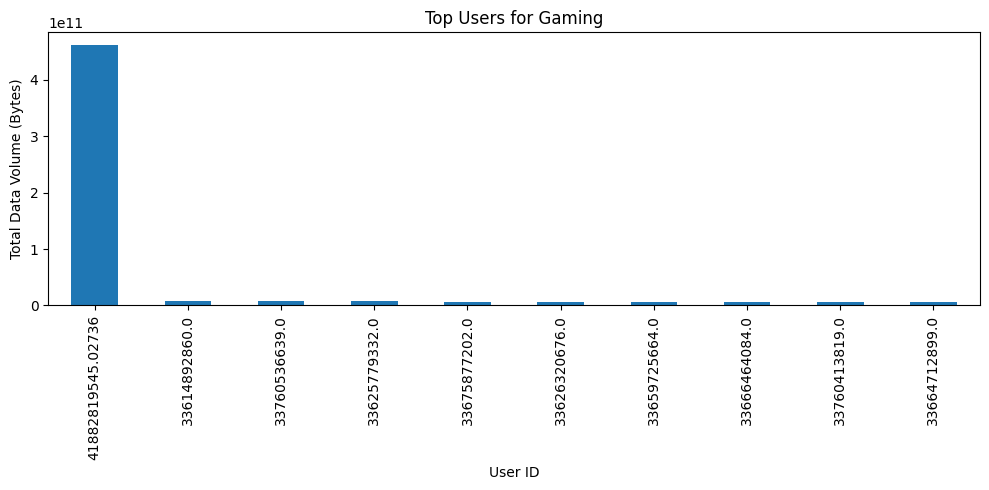

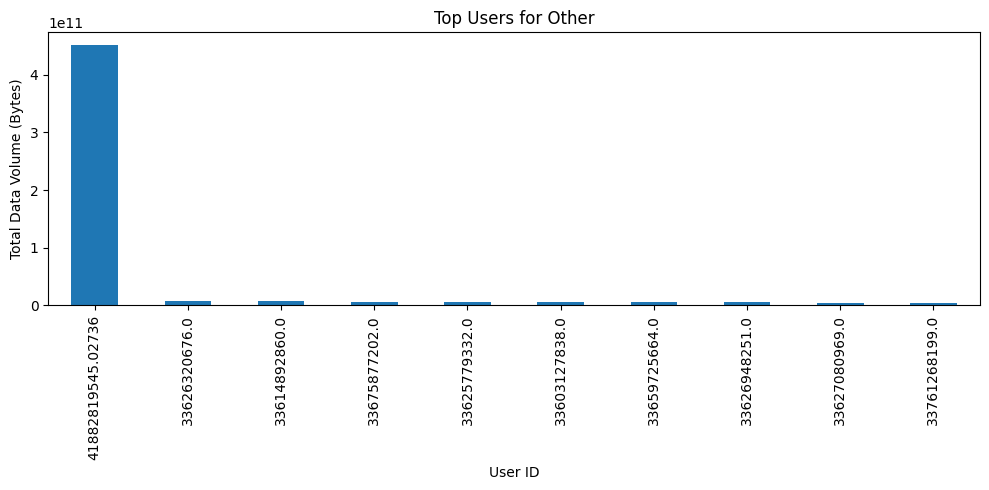

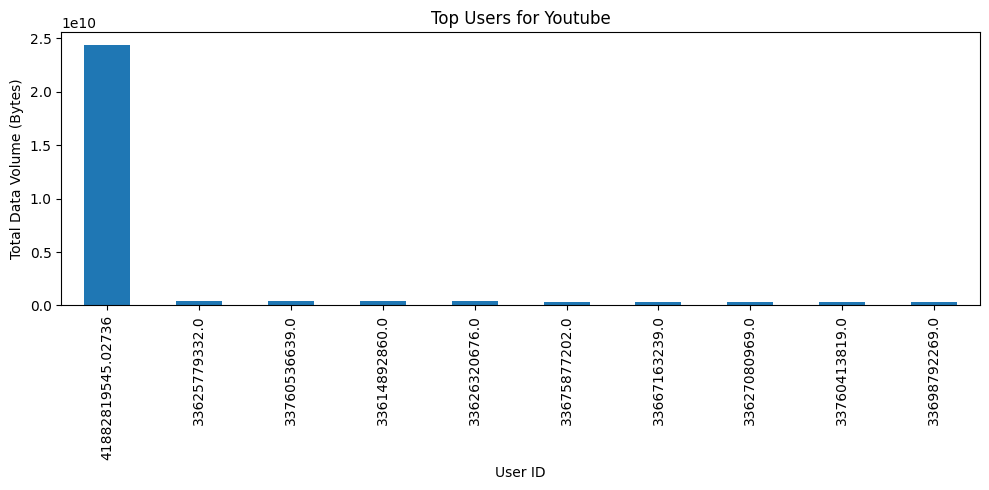

In [25]:
# Ensure inline plotting
get_ipython().run_line_magic('matplotlib', 'inline')

# Verify the columns in the dataset
print("Columns in the dataset:", df.columns)

# Define application-related columns for DL (Download) and UL (Upload)
application_columns = {
    'Social Media': ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
    'Google': ['Google DL (Bytes)', 'Google UL (Bytes)'],
    'Email': ['Email DL (Bytes)', 'Email UL (Bytes)'],
    'Youtube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}

# Create a DataFrame to store total data volume for each application
traffic_per_app = []

for app, columns in application_columns.items():
    # Calculate total data volume for each application (sum of DL and UL)
    total_volume = df[columns].sum().sum()  # Sum DL and UL across all users
    traffic_per_app.append({'Application': app, 'Total Data Volume': total_volume})

# Convert to DataFrame
traffic_per_app_df = pd.DataFrame(traffic_per_app)

# Get the top 3 applications by total data volume
top_apps = traffic_per_app_df.nlargest(3, 'Total Data Volume')

# Plot the data for the top 3 applications
for _, row in top_apps.iterrows():
    app = row['Application']
    # Aggregate total data volume per user for the current application
    app_data = df.groupby('MSISDN')[
        application_columns[app]
    ].sum().sum(axis=1)  # Sum DL and UL for each user

    # Plot the data for the application
    app_data.sort_values(ascending=False).head(10).plot(
        kind='bar', figsize=(10, 5), title=f'Top Users for {app}'
    )
    plt.xlabel('User ID')
    plt.ylabel('Total Data Volume (Bytes)')
    plt.tight_layout()
    plt.show()


Determine Optimized Value of k Using the Elbow Method


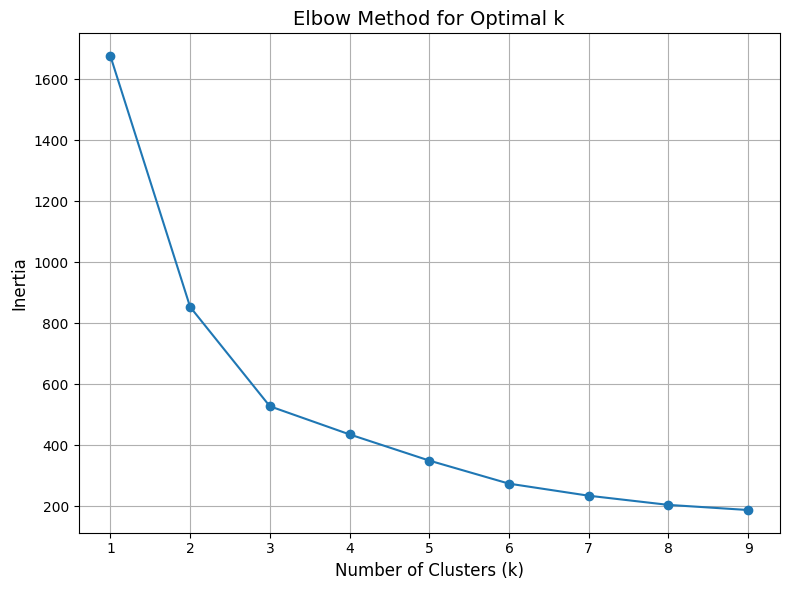

Cluster Centers:
[[1.20546003e-03 2.14215638e-03 7.43327633e-03 5.18071833e-03
  3.89328225e-03 2.26197181e-04]
 [8.31687782e-04 3.69222750e-03 1.51556315e-01 3.47907549e-01
  1.11742283e-02 9.44584737e-04]
 [8.89266695e-04 3.66066732e-03 1.27829555e-01 6.41527074e-02
  7.48349776e-03 2.52947338e-04]]

Cluster Distribution:
Cluster
0    116709
2     26989
1      6303
Name: count, dtype: int64

Clustered data saved to 'clustered_telecom_data.xlsx'.


In [26]:
# Select relevant columns for clustering
# For this example, we'll use a subset of columns (you can adjust based on your analysis)
clustering_columns = [
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
data_for_clustering = df[clustering_columns]

# Handle missing values (fill with column mean)
data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)

# Normalize the data
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(data_for_clustering)

# Elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 10)  # Test k values from 1 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init=10
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Perform KMeans clustering with the optimal k (e.g., 3, based on elbow curve)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Analyze the clusters
print("Cluster Centers:")
print(kmeans.cluster_centers_)

print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

# Save clustered data to a new file (optional)
df.to_excel('clustered_telecom_data.xlsx', index=False)
print("\nClustered data saved to 'clustered_telecom_data.xlsx'.")



Interpretation:

  Top Customers: The top 10 customers based on each engagement metric highlight who the most engaged users are, allowing targeted strategies for retention or upselling.

  Clusters: Clustering users into three groups helps identify distinct engagement levels, informing personalized marketing efforts.

  Top Applications: Understanding which applications drive the most engagement enables better resource allocation and promotional activities.


# Task 3 - Experience Analytics

Aggregate Experience Metrics

Aggregate Per Customer


In [27]:
# Aggregate experience metrics per customer
experience_metrics = df.groupby('MSISDN').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Handset Type': 'first',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).reset_index()

# Treat missing values with mean or mode
experience_metrics['TCP DL Retrans. Vol (Bytes)'].fillna(experience_metrics['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
experience_metrics['TCP UL Retrans. Vol (Bytes)'].fillna(experience_metrics['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)
experience_metrics['Avg RTT DL (ms)'].fillna(experience_metrics['Avg RTT DL (ms)'].mean(), inplace=True)
experience_metrics['Avg RTT UL (ms)'].fillna(experience_metrics['Avg RTT UL (ms)'].mean(), inplace=True)
experience_metrics['Avg Bearer TP DL (kbps)'].fillna(experience_metrics['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
experience_metrics['Avg Bearer TP UL (kbps)'].fillna(experience_metrics['Avg Bearer TP UL (kbps)'].mean(), inplace=True)
experience_metrics['Handset Type'].fillna(experience_metrics['Handset Type'].mode()[0], inplace=True)

# Display the aggregated experience metrics
print(experience_metrics.head())



         MSISDN  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0  3.360100e+10                 2.080991e+07                759658.664811   
1  3.360100e+10                 2.080991e+07                759658.664811   
2  3.360100e+10                 2.080991e+07                759658.664811   
3  3.360101e+10                 1.066000e+03                759658.664811   
4  3.360101e+10                 1.507977e+07                390430.332406   

   Avg RTT DL (ms)  Avg RTT UL (ms)                    Handset Type  \
0        46.000000         0.000000  Huawei P20 Lite Huawei Nova 3E   
1        30.000000         1.000000          Apple iPhone 7 (A1778)   
2       109.795706        17.662883                       undefined   
3        69.000000        15.000000         Apple iPhone 5S (A1457)   
4        57.000000         2.500000         Apple iPhone Se (A1723)   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  
0                     37.0                     39.0  
1 

Top and Bottom Metrics

Compute Top 10, Bottom 10, and Most Frequent Values

In [28]:
# Top 10, Bottom 10, and most frequent RTT values
top_rtt = experience_metrics.nlargest(10, 'Avg RTT DL (ms)')
bottom_rtt = experience_metrics.nsmallest(10, 'Avg RTT DL (ms)')
most_frequent_rtt = experience_metrics['Avg RTT DL (ms)'].mode()[0]

top_rtt = experience_metrics.nlargest(10, 'Avg RTT UL (ms)')
bottom_rtt = experience_metrics.nsmallest(10, 'Avg RTT UL (ms)')
most_frequent_rtt = experience_metrics['Avg RTT UL (ms)'].mode()[0]

# Display results
top_rtt, bottom_rtt, most_frequent_rtt


(              MSISDN  TCP DL Retrans. Vol (Bytes)  \
 37287   3.365978e+10                 2.080991e+07   
 17134   3.363330e+10                 2.080991e+07   
 94139   3.376109e+10                 2.080991e+07   
 103348  3.377808e+10                 5.158628e+06   
 55722   3.366428e+10                 2.080991e+07   
 48159   3.366236e+10                 2.080991e+07   
 20344   3.364339e+10                 2.080991e+07   
 39572   3.366032e+10                 2.080991e+07   
 73236   3.366998e+10                 2.080991e+07   
 16800   3.363255e+10                 2.080991e+07   
 
         TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
 37287                 759658.664811             38.0           7120.0   
 17134                 759658.664811             53.0           5607.0   
 94139                 759658.664811             31.0           5422.0   
 103348                759658.664811             71.0           3923.0   
 55722                 759658.6648

In [29]:
# Top 10, Bottom 10, and most frequent Throughput values
top_throughput = experience_metrics.nlargest(10, 'Avg Bearer TP DL (kbps)')
bottom_throughput = experience_metrics.nsmallest(10, 'Avg Bearer TP DL (kbps)')
most_frequent_throughput = experience_metrics['Avg Bearer TP DL (kbps)'].mode()[0]


top_throughput = experience_metrics.nlargest(10, 'Avg Bearer TP UL (kbps)')
bottom_throughput = experience_metrics.nsmallest(10, 'Avg Bearer TP UL (kbps)')
most_frequent_throughput = experience_metrics['Avg Bearer TP UL (kbps)'].mode()[0]

# Display results
top_throughput, bottom_throughput, most_frequent_throughput



(              MSISDN  TCP DL Retrans. Vol (Bytes)  \
 6542    3.361508e+10                   25395334.0   
 75465   3.367417e+10                    1454330.0   
 31624   3.365855e+10                    1837851.0   
 7606    3.361674e+10                      17416.0   
 14596   3.362804e+10                       3978.0   
 103604  3.378004e+10                    7435025.0   
 100302  3.376374e+10                     836290.0   
 69920   3.366871e+10                    4728437.0   
 43785   3.366135e+10                   49408068.0   
 51990   3.366327e+10                   21921040.0   
 
         TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
 6542                      2177374.0             39.0             21.0   
 75465                      367610.0             45.0             21.0   
 31624                       31196.0             51.0              4.0   
 7606                           98.0             40.0             10.0   
 14596                      144970

Distribution Analysis

 Distribution of Average Throughput Per Handset Type

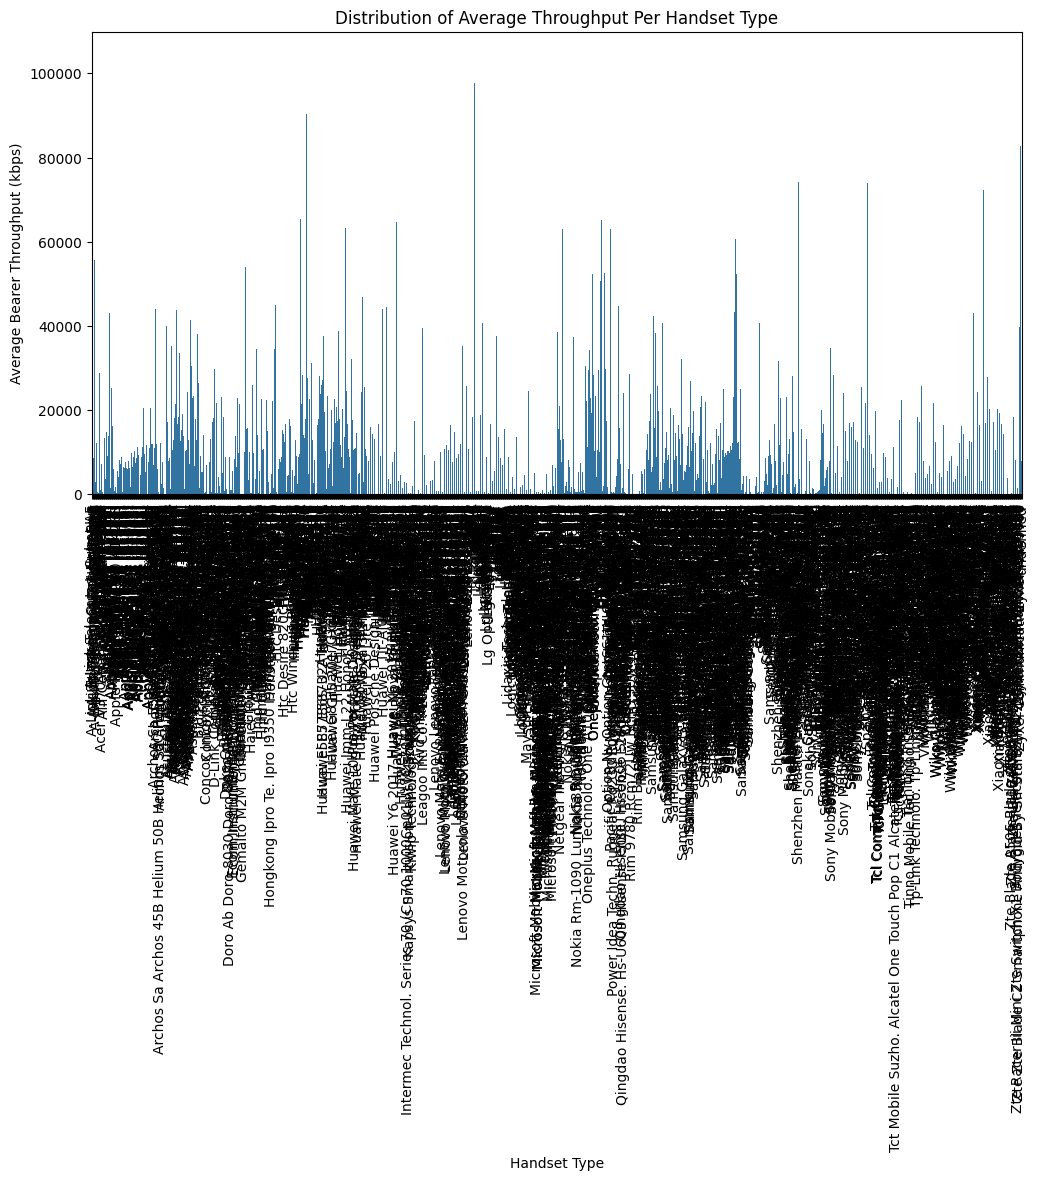

In [30]:
# Check if the required columns exist in the DataFrame
if 'Handset Type' in experience_metrics.columns and 'Avg Bearer TP DL (kbps)' in experience_metrics.columns:
    # Group by 'Handset Type' and calculate the average throughput
    handset_throughput = experience_metrics.groupby('Handset Type')['Avg Bearer TP DL (kbps)'].mean().reset_index()

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Handset Type', y='Avg Bearer TP DL (kbps)', data=handset_throughput)
    plt.xticks(rotation=90)
    plt.title('Distribution of Average Throughput Per Handset Type')
    plt.xlabel('Handset Type')
    plt.ylabel('Average Bearer Throughput (kbps)')
    plt.tight_layout()
    plt.show()
else:
    print("Error: One or both of the columns 'Handset Type' and 'Avg Bearer TP DL (kbps)' are missing from the DataFrame.")

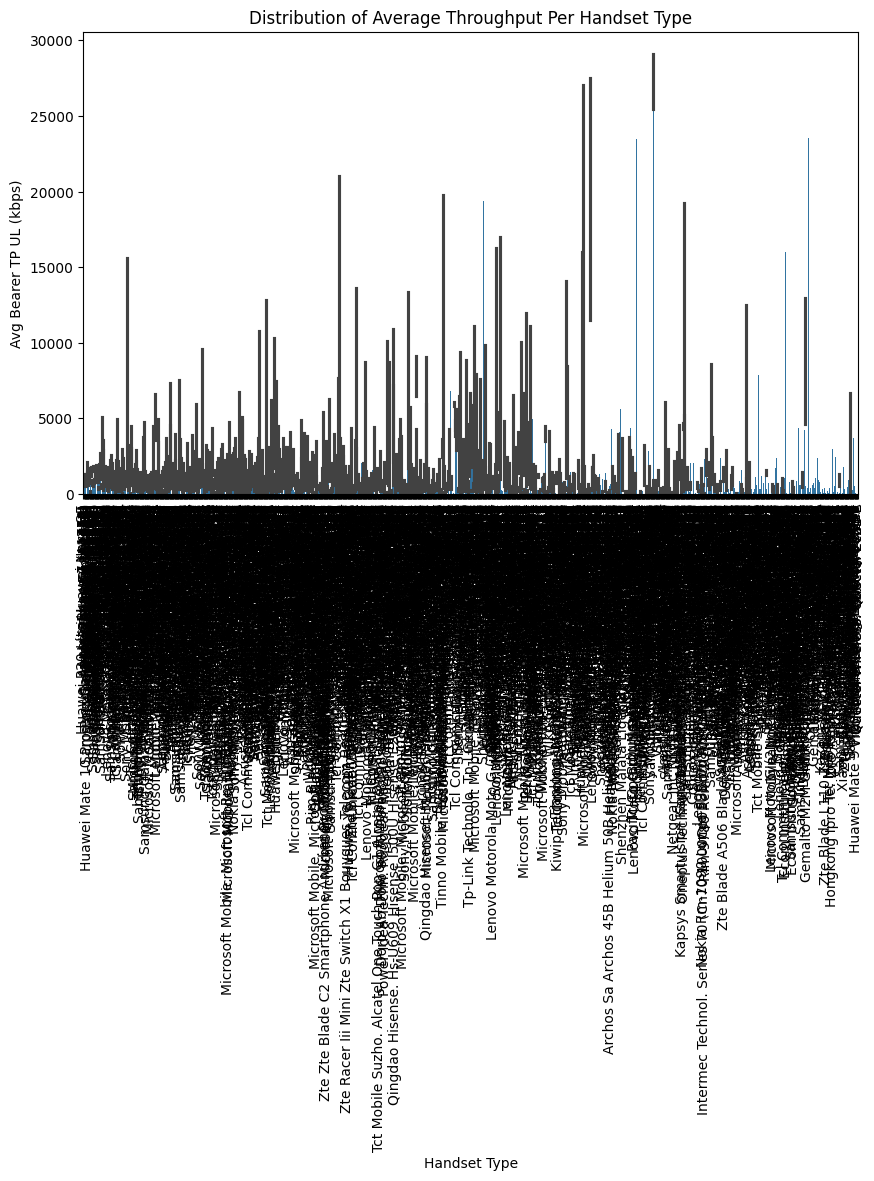

In [31]:
# Distribution of average throughput per handset type
plt.figure(figsize=(10, 6))
sns.barplot(x='Handset Type', y='Avg Bearer TP UL (kbps)', data=experience_metrics)
plt.xticks(rotation=90)
plt.title('Distribution of Average Throughput Per Handset Type')
plt.show()

Average TCP Retransmission Per Handset Type

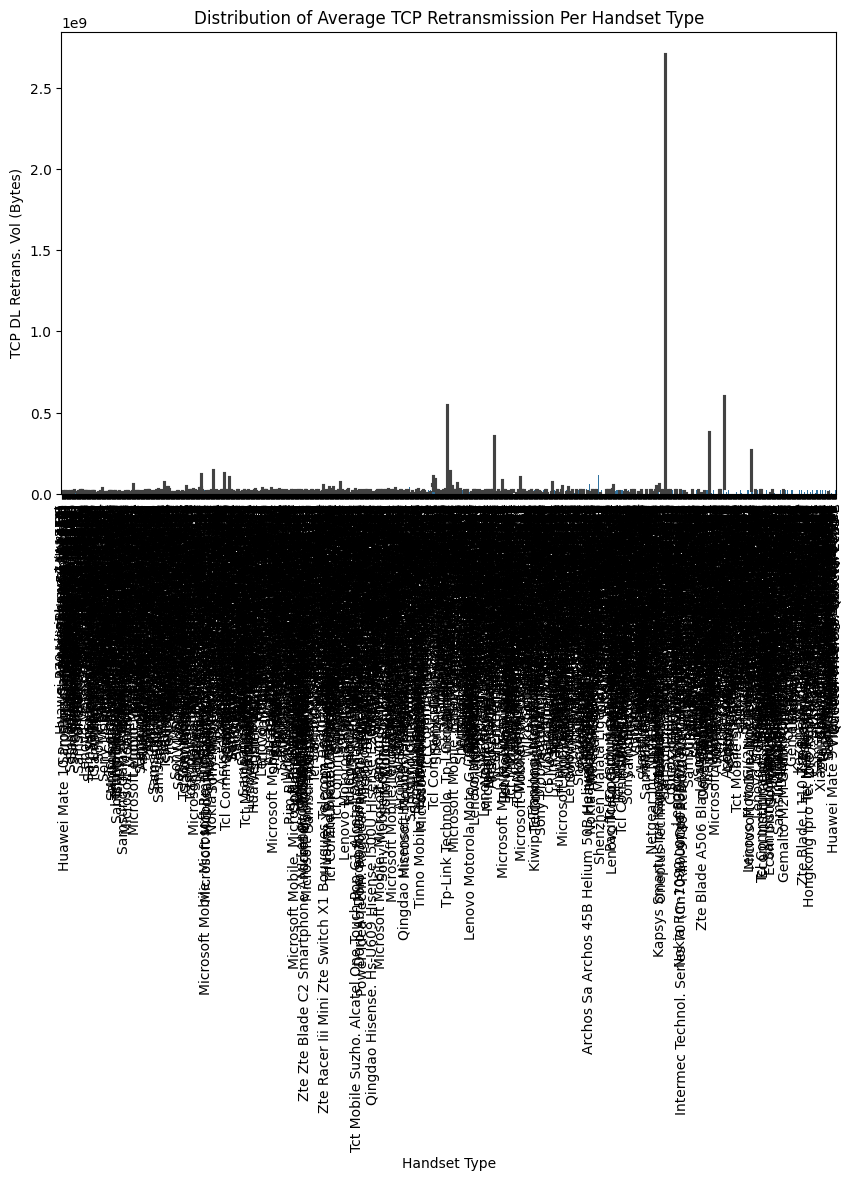

In [32]:
# Distribution of average TCP retransmission per handset type
plt.figure(figsize=(10, 6))
sns.barplot(x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', data=experience_metrics)
plt.xticks(rotation=90)
plt.title('Distribution of Average TCP Retransmission Per Handset Type')
plt.show()

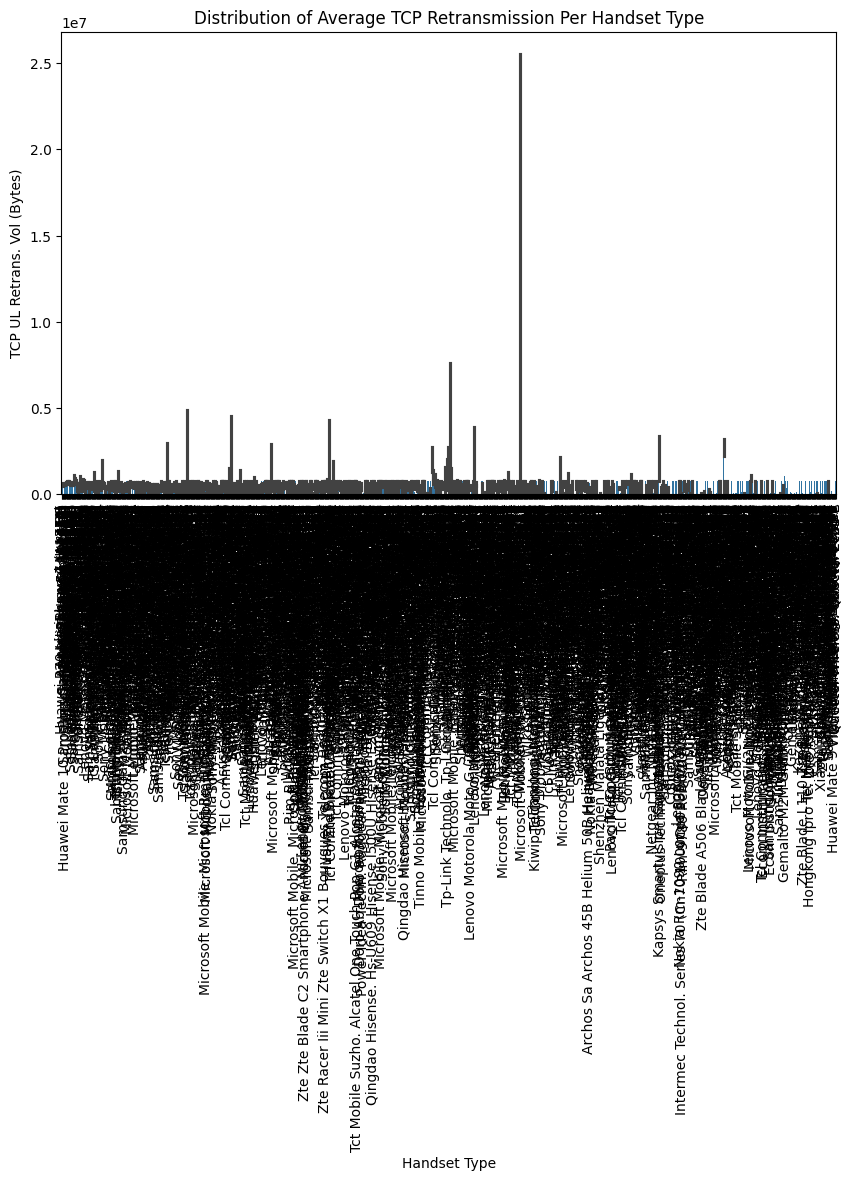

In [33]:
# Distribution of average TCP retransmission per handset type
plt.figure(figsize=(10, 6))
sns.barplot(x='Handset Type', y='TCP UL Retrans. Vol (Bytes)', data=experience_metrics)
plt.xticks(rotation=90)
plt.title('Distribution of Average TCP Retransmission Per Handset Type')
plt.show()

Clustering User Experiences

Perform K-Means Clustering (k=3)

In [34]:
# Prepare the data for clustering
clustering_data = experience_metrics[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]
scaler = StandardScaler()
normalized_clustering_data = scaler.fit_transform(clustering_data)

# Run k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
experience_metrics['Experience Cluster'] = kmeans.fit_predict(normalized_clustering_data)

# Display cluster assignments
experience_metrics.head()


,MSISDN,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Experience Cluster
0,3.360100e+10,2.080991e+07,759658.664811,46.000000,0.000000,Huawei P20 Lite Huawei Nova 3E,37.0,39.0,0
1,3.360100e+10,2.080991e+07,759658.664811,30.000000,1.000000,Apple iPhone 7 (A1778),48.0,51.0,0
2,3.360100e+10,2.080991e+07,759658.664811,109.795706,17.662883,undefined,48.0,49.0,0
3,3.360101e+10,1.066000e+03,759658.664811,69.000000,15.000000,Apple iPhone 5S (A1457),204.0,44.0,0
4,3.360101e+10,1.507977e+07,390430.332406,57.000000,2.500000,Apple iPhone Se (A1723),20197.5,8224.5,2


Segment Users Into Experience Groups


In [35]:
# Description of each cluster
cluster_descriptions = experience_metrics.groupby('Experience Cluster').agg({
    'TCP DL Retrans. Vol (Bytes)': ['mean', 'min', 'max'],
    'TCP UL Retrans. Vol (Bytes)': ['mean', 'min', 'max'],
    'Avg RTT DL (ms)': ['mean', 'min', 'max'],
    'Avg RTT UL (ms)': ['mean', 'min', 'max'],
    'Avg Bearer TP DL (kbps)': ['mean', 'min', 'max'],
    'Avg Bearer TP UL (kbps)': ['mean', 'min', 'max']})

# Display cluster descriptions
cluster_descriptions


TCP DL Retrans. Vol (Bytes)                      \
                                          mean   min           max   
Experience Cluster                                                   
0                                 1.651078e+07   2.0  6.898160e+08   
1                                 1.491574e+08  38.0  4.289488e+09   
2                                 1.249842e+07  31.0  8.324968e+08   

                   TCP UL Retrans. Vol (Bytes)                     \
                                          mean  min           max   
Experience Cluster                                                  
0                                 6.457337e+05  1.0  1.059995e+08   
1                                 4.647744e+06  2.0  2.455600e+09   
2                                 4.229096e+05  1.0  2.054694e+08   

                   Avg RTT DL (ms)                Avg RTT UL (ms)       \
                              mean   min      max            mean  min   
Experience Cluster                                                       
0                       127.846122   0.0  96923.0       10.704787  0.0   
1                        83.330711  16.0   8293.0       28.378715  1.0   
2                        81.466603   0.0   6625.0       41.041822  0.0   

                           Avg Bearer TP DL (kbps)                   \
                       max                    mean    min       max   
Experience Cluster                                                    
0                    443.0             2954.430682    0.0   31778.5   
1                   1203.0            56455.810581  425.0  245347.0   
2                   7120.0            41115.723736    1.0  264448.0   

                   Avg Bearer TP UL (kbps)                  
                                      mean    min      max  
Experience Cluster                                          
0                               336.450504    0.0  11503.5  
1                             18386.775919  567.5  58613.0  
2                              3601.692403    0.0  13845.0

 Interpretation:
     
 Aggregated Metrics: The aggregated data shows customer-level insights into TCP retransmission, RTT, throughput, and handset type.

 Top and Bottom Values: Identifying top and bottom performers for each metric highlights variability in user experiences.

 Distribution Analysis: Visual distributions of throughput and TCP retransmission per handset type reveal performance trends across devices.

 Clustering: Clustering helps segment users into experience groups, offering a pathway to tailor services for different user needs.


#  Task 4 - Satisfaction Analysis


Assign Scores

Assign Engagement and Experience Scores

In [36]:
# Define engagement-related and experience-related metrics
engagement_metrics_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                               'Total Data Volume', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)']
experience_metrics_columns = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                               'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                               'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Select relevant data for clustering
engagement_metrics = df[engagement_metrics_columns].fillna(0)
experience_metrics = df[experience_metrics_columns].fillna(0)

# Normalize the data
scaler = MinMaxScaler()
normalized_engagement = scaler.fit_transform(engagement_metrics)
normalized_experience = scaler.fit_transform(experience_metrics)

# Apply KMeans for engagement metrics
kmeans_engagement = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Engagement Cluster'] = kmeans_engagement.fit_predict(normalized_engagement)

# Apply KMeans for experience metrics
kmeans_experience = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Experience Cluster'] = kmeans_experience.fit_predict(normalized_experience)

# Calculate cluster centers
engagement_cluster_centers = kmeans_engagement.cluster_centers_
experience_cluster_centers = kmeans_experience.cluster_centers_

# Identify the least engaged cluster
least_engaged_cluster_index = df['Engagement Cluster'].value_counts().idxmin()
least_engaged_center = engagement_cluster_centers[least_engaged_cluster_index]

# Assign engagement score based on Euclidean distance to least-engaged cluster center
df['Engagement Score'] = pd.DataFrame(normalized_engagement).apply(
    lambda row: euclidean(
        row.values,
        least_engaged_center
    ), axis=1
)

# Identify the worst experience cluster
worst_experience_cluster_index = df['Experience Cluster'].value_counts().idxmin()
worst_experience_center = experience_cluster_centers[worst_experience_cluster_index]

# Assign experience score based on Euclidean distance to worst-experience cluster center
df['Experience Score'] = pd.DataFrame(normalized_experience).apply(
    lambda row: euclidean(
        row.values,
        worst_experience_center
    ), axis=1
)

# Display the scores for the first few users
print(df[['MSISDN', 'Engagement Score', 'Experience Score']].head())

# Save the updated DataFrame with scores to an Excel file
output_file = 'engagement_experience_scores.xlsx'
df.to_excel(output_file, index=False)
print(f"\nEngagement and Experience Scores saved to '{output_file}'.")

         MSISDN  Engagement Score  Experience Score
0  3.366496e+10          0.386415          0.378838
1  3.368185e+10          0.862860          0.379127
2  3.376063e+10          0.597282          0.379393
3  3.375034e+10          0.771247          0.378806
4  3.369980e+10          0.641030          0.379393

Engagement and Experience Scores saved to 'engagement_experience_scores.xlsx'.


 Satisfaction Score

 Calculate Satisfaction Score and Report Top 10 Customers


In [37]:
# Calculate the satisfaction score
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience Score']) / 2

# Report top 10 satisfied customers
top_satisfied_customers = df.nlargest(10, 'Satisfaction Score')

# Display the top 10 satisfied customers with MSISDN and Satisfaction Score
print(top_satisfied_customers[['MSISDN', 'Satisfaction Score']])

# Save the top satisfied customers to an Excel file
output_file = 'top_satisfied_customers.xlsx'
top_satisfied_customers[['MSISDN', 'Satisfaction Score']].to_excel(output_file, index=False)
print(f"\nTop satisfied customers saved to '{output_file}'.")

              MSISDN  Satisfaction Score
39608   3.366491e+10            1.029274
41182   3.365863e+10            1.016345
31709   3.365974e+10            1.002189
140797  3.369858e+10            0.953960
140912  3.376078e+10            0.952308
30155   3.366232e+10            0.951792
3042    3.366066e+10            0.943548
67481   3.366613e+10            0.905374
41396   3.365990e+10            0.903525
3741    3.365871e+10            0.891851

Top satisfied customers saved to 'top_satisfied_customers.xlsx'.


 Predicting Satisfaction

 Build a Regression Model


In [38]:
# Ensure the required columns are available
if 'Engagement Score' not in df.columns or 'Experience Score' not in df.columns or 'Satisfaction Score' not in df.columns:
    raise ValueError("Required columns ('Engagement Score', 'Experience Score', 'Satisfaction Score') are missing from the dataset.")

# Features and target variable
X = df[['Engagement Score', 'Experience Score']]
y = df['Satisfaction Score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output model performance and parameters
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Save the predictions for analysis
predictions_df = X_test.copy()
predictions_df['Actual Satisfaction Score'] = y_test
predictions_df['Predicted Satisfaction Score'] = y_pred

# Save to an Excel file
output_file = 'satisfaction_score_predictions.xlsx'
predictions_df.to_excel(output_file, index=False)
print(f"\nPredictions saved to '{output_file}'.")



Model Coefficients: [0.5 0.5]
Model Intercept: -1.5543122344752192e-15
Mean Squared Error: 0.00
R-squared Score: 1.00

Predictions saved to 'satisfaction_score_predictions.xlsx'.


 Clustering Satisfaction and Experience

 Run K-Means Clustering


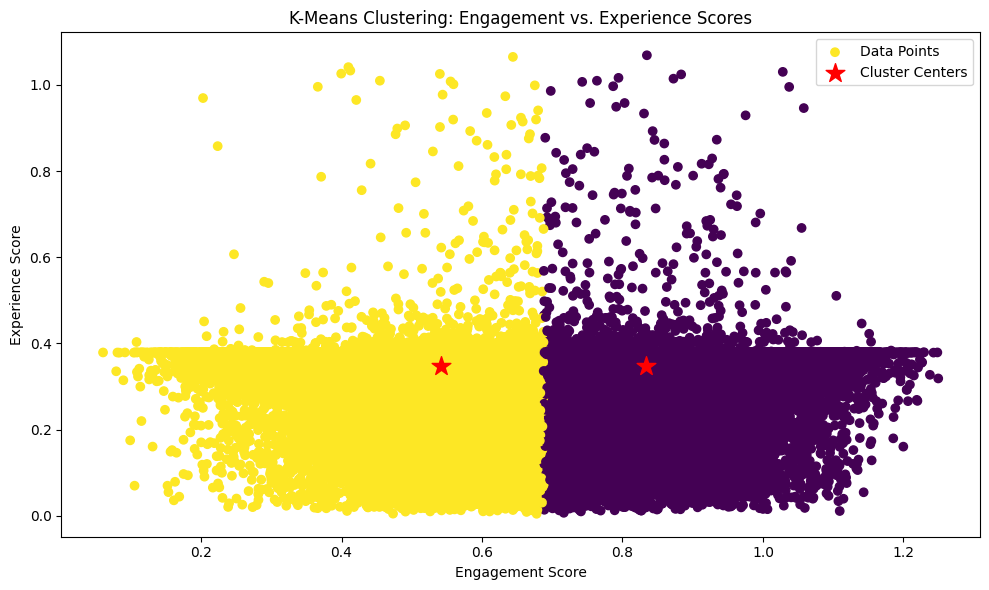

,MSISDN,Engagement Score,Experience Score,Satisfaction Cluster
0,3.366496e+10,0.386415,0.378838,1
1,3.368185e+10,0.862860,0.379127,0
2,3.376063e+10,0.597282,0.379393,1
3,3.375034e+10,0.771247,0.378806,0
4,3.369980e+10,0.641030,0.379393,1


In [39]:
# Ensure the required columns are available
if 'Engagement Score' not in df.columns or 'Experience Score' not in df.columns:
    raise ValueError("Required columns ('Engagement Score', 'Experience Score') are missing from the dataset.")

# Features for clustering
X = df[['Engagement Score', 'Experience Score']]

# Run k-means clustering with n_init explicitly set to suppress the warning
kmeans_satisfaction = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Satisfaction Cluster'] = kmeans_satisfaction.fit_predict(X)

# Add cluster centers to the DataFrame for visualization
cluster_centers = kmeans_satisfaction.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Engagement Score'], X['Experience Score'], c=df['Satisfaction Cluster'], cmap='viridis', label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='*', label='Cluster Centers')
plt.title('K-Means Clustering: Engagement vs. Experience Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.legend()
plt.tight_layout()
plt.show()

# Display the DataFrame with cluster assignments
df[['MSISDN', 'Engagement Score', 'Experience Score', 'Satisfaction Cluster']].head()

 Aggregate Scores per Cluster


In [40]:
# Aggregate average satisfaction and experience scores per cluster
cluster_aggregate = df.groupby('Satisfaction Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
}).reset_index()

# Rename columns for better readability
cluster_aggregate.rename(columns={
    'Satisfaction Score': 'Average Satisfaction Score',
    'Experience Score': 'Average Experience Score'
}, inplace=True)

# Display the aggregated scores
print(cluster_aggregate)

   Satisfaction Cluster  Average Satisfaction Score  Average Experience Score
0                     0                    0.590953                  0.348512
1                     1                    0.445147                  0.348608


Export to MySQL

In [41]:
# Assuming `experience_metrics` is a Pandas DataFrame
# Replace NaN values with 0 to avoid NULL errors
experience_metrics = experience_metrics.fillna(0)

# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    port='3306',
    user='root',
    password='root',
    auth_plugin='mysql_native_password',
    database='telecom'
)

cursor = conn.cursor()

# Create table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS UserMetrics (
        MSISDN VARCHAR(100),
        EngagementScore FLOAT,
        ExperienceScore FLOAT,
        SatisfactionScore FLOAT
    )
''')

# Insert data

cursor.execute('''
    INSERT INTO UserMetrics (MSISDN, EngagementScore, ExperienceScore, SatisfactionScore)
        VALUES  (3.366496e+10,	0.386415,	0.378838,	1),
                (3.368185e+10,	0.862860,	0.379127,	0),
                (3.376063e+10,	0.597282,	0.379393,	1),
                (3.375034e+10,	0.771247,	0.378806,	0),
                (3.369980e+10,	0.641030,	0.379393,	1)
''')

conn.commit()

# Final commit and close
conn.commit()
cursor.close()
conn.close()


In [42]:
import logging 
import time

# Set up logging
logging.basicConfig(filename='model_tracking.log', level=logging.INFO, format='%(asctime)s - %(message)s')


# Ensure required columns exist
required_columns = ['Engagement Score', 'Experience Score', 'Satisfaction Score']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Missing required columns: {[col for col in required_columns if col not in df.columns]}")

# Features & target variable
X = df[['Engagement Score', 'Experience Score']]
y = df['Satisfaction Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model parameters (Example)
params = {
    "model": "LinearRegression",
    "test_size": 0.2,
    "random_state": 42
}

# Start time
start_time = time.time()

# Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
metrics = {
    "Mean Squared Error": mean_squared_error(y_test, y_pred),
    "R-squared Score": r2_score(y_test, y_pred),
    "Model Coefficients": model.coef_.tolist(),
    "Model Intercept": model.intercept_
}

# End time
end_time = time.time()

# Log execution details
logging.info(f"Run started at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time))}")
logging.info(f"Run ended at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time))}")
logging.info(f"Execution Time: {round(end_time - start_time, 2)} seconds")
logging.info(f"Parameters used: {params}")
logging.info(f"Model performance metrics: {metrics}")

# Print log confirmation
print("\n✅ Model tracking completed. Check 'model_tracking.log' for details.")

# Save predictions to an Excel file
output_file = "satisfaction_score_predictions.xlsx"
predictions_df = X_test.copy()
predictions_df["Actual Satisfaction Score"] = y_test
predictions_df["Predicted Satisfaction Score"] = y_pred
predictions_df.to_excel(output_file, index=False)

print(f"\n✅ Predictions saved to '{output_file}'.")



✅ Model tracking completed. Check 'model_tracking.log' for details.

✅ Predictions saved to 'satisfaction_score_predictions.xlsx'.
